# **Welcome to Inferential Statistics**

### Confidence Interval

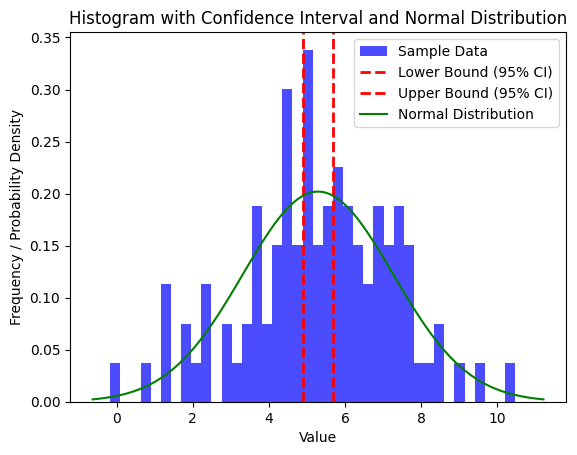

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = np.random.normal(loc=5, scale=2, size=100) #loc= mean, scale = std dev,

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = 1.96 * (std_dev / np.sqrt(len(data)))

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Plot the histogram
plt.hist(data, bins=40, density=True, alpha=0.7, color='blue', label='Sample Data')

# Plot the confidence interval
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')

# Plot the normal distribution curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), color='green', label='Normal Distribution')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram with Confidence Interval and Normal Distribution')
plt.legend()

# Show the plot
plt.show()

### One Sample T test

In [16]:
from scipy import stats
import numpy as np

# Given data
sample_mean = 140       # Mean salary
sample_std = 20         # Standard deviation
n = 30                  # Sample size
population_mean = 100   # Hypothesized population mean
alpha = 0.05            # Significance level

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate the degrees of freedom
degrees_of_freedom = n - 1

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_statistic), degrees_of_freedom) * 2  # two-tailed test
# p_value2 = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

# Determine whether to accept or reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Accept the null hypothesis. The sample mean is not significantly different from the population mean.")

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Reject the null hypothesis. The sample mean is significantly different from the population mean.
t-statistic: 10.954451150103322
p-value: 8.02128714022661e-12


### Two Samples T test

In [17]:
# Example: Comparing Test Scores of Students from Different Schools

# Suppose we have two groups of students: students from School A and students from School B. 
# We want to determine if there's a significant difference in their performance on a standardized test.

# Here's the setup:

#     Group A consists of 30 students from School A.
#     Group B consists of 30 students from School B.
#     Both schools claim that their teaching methods are superior, so we want to test if 
#     there's evidence to support either claim.

In [18]:
import numpy as np
from scipy import stats

# Generate random test scores for students from School A and School B
np.random.seed(42)  # simply call it "random number generator"
school_a_scores = np.random.normal(loc=75, scale=8, size=30)    # Test scores for students from School A
school_b_scores = np.random.normal(loc=80, scale=10, size=30)   # Test scores for students from School B

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(school_a_scores, school_b_scores)

# Print results
print("Results of Independent Two-sample t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject null hypothesis. There is a significant difference in test scores between students from School A and School B.")
    if np.mean(school_a_scores) > np.mean(school_b_scores):
        print("School A's teaching methods may have a significant advantage.")
    else:
        print("School B's teaching methods may have a significant advantage.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant difference in test scores between students from School A and School B.")
    print("Both schools may have similar teaching effectiveness.")

Results of Independent Two-sample t-test:
t-statistic: -2.4633525160002296
p-value: 0.016752787106235536
Conclusion: Reject null hypothesis. There is a significant difference in test scores between students from School A and School B.
School B's teaching methods may have a significant advantage.


### Paired T test

In [19]:
# Example: Examining the Effectiveness of a Memory Technique

# Suppose a group of students wants to test the effectiveness of a memory technique called "Method of Loci" 
# in improving memory retention. The method involves associating items to be remembered with specific locations 
# in a familiar environment, such as rooms in a house.

# Here's the setup:

#     The students will take a memory test before and after using the Method of Loci.
#     Each student will recall a list of 20 words both before and after using the memory technique.
#     We want to determine if there's a significant improvement in memory performance after using the Method 
#     of Loci

In [17]:
import numpy as np
from scipy import stats

# Generate random memory test scores before and after using Method of Loci
np.random.seed(42)
before_scores = np.random.normal(loc=12, scale=3, size=30)      # Memory test scores before using Method of Loci
after_scores = np.random.normal(loc=16, scale=2.5, size=30)     # Memory test scores after using Method of Loci

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(before_scores, after_scores)

# Print results
print("Results of Paired t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Conclusion: Reject null hypothesis. There is a significant improvement in memory performance after using the Method of Loci.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant improvement in memory performance after using the Method of Loci.")

Results of Paired t-test:
t-statistic: -6.893132921764711
p-value: 1.4213065924705746e-07
Conclusion: Reject null hypothesis. There is a significant improvement in memory performance after using the Method of Loci.


### One Sample Z test

In [22]:
# A factory has a machine that dispenses 80 ml of fluid in a bottle and employee believes the average amount of 
# fluid is not using 40 samples he measures the average amount dispensed by the machine to be 78 ml with the 
# standard deviation of 2.5 point a state the null and alternate hypothesis point b at 95% confidence interval
# is that enough evidence to support the idea that the machine is not working properly

In [23]:
import numpy as np
from scipy.stats import norm

# Given data
sample_mean = 78       # Average amount measured by the employee
population_mean = 80   # Assumed average amount dispensed by the machine
std_dev = 2.5          # Standard deviation of the measurements
n = 40                 # Sample size
alpha = 0.05           # Significance level

# Calculate the z-score
z_score = (sample_mean - population_mean) / (std_dev / np.sqrt(n))

# Calculate the critical z-value for two-tailed test
critical_z = norm.ppf(1 - alpha/2)

# Print the z-score and critical z-value
print("Z-score:", z_score)
print("Critical Z-value:", critical_z)

# Determine whether to reject or fail to reject the null hypothesis
if np.abs(z_score) > critical_z:
    print("Reject the null hypothesis. There is enough evidence to support the idea that the machine is not working properly.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the idea that the machine is not working properly.")

Z-score: -5.059644256269407
Critical Z-value: 1.959963984540054
Reject the null hypothesis. There is enough evidence to support the idea that the machine is not working properly.


code to find z value (critical_z)

In [1]:
from scipy.stats import norm

# Significance level (alpha) for a two-tailed test
alpha = 0.05

# Calculate the critical Z-value
critical_z = norm.ppf(1 - alpha/2)     # /2 for 2 tailed test, else not

print(f"Critical Z-value for a {alpha} significance level (two-tailed): {critical_z}")

Critical Z-value for a 0.05 significance level (two-tailed): 1.959963984540054


### Two samples z test

In [32]:
# Example: Comparing Sleep Quality of Coffee Drinkers and Tea Drinkers

# Suppose we want to compare the sleep quality of people who drink coffee regularly 
# with those who drink tea regularly. We'll collect data on the number of hours of sleep
# each group gets per night over a week and determine if there's a significant difference in 
# sleep duration between the two groups.

# Here's the setup:

#     Group 1: Coffee Drinkers
#     Group 2: Tea Drinkers

# We'll collect data from 30 participants in each group.

# Null hypothesis (H0): There is no significant difference in the average hours of sleep between coffee drinkers 
#     and tea drinkers.
# Alternate hypothesis (H1): There is a significant difference in the average hours of sleep between coffee 
#     drinkers and tea drinkers.

In [20]:
import numpy as np
from scipy.stats import norm

# Generate random data for sleep duration (in hours) for coffee drinkers and tea drinkers
np.random.seed(42)
coffee_sleep = np.random.normal(loc=7, scale=1, size=30)  # Average sleep duration for coffee drinkers
tea_sleep = np.random.normal(loc=7.5, scale=1.2, size=30)  # Average sleep duration for tea drinkers

# Given data
alpha = 0.05  # Significance level
n = 30        # Sample size for each group

# Calculate sample means
mean_coffee = np.mean(coffee_sleep)
mean_tea = np.mean(tea_sleep)

# Calculate sample standard deviations
std_dev_coffee = np.std(coffee_sleep)
std_dev_tea = np.std(tea_sleep)

# Calculate the standard error of the difference between means
std_error_diff = np.sqrt((std_dev_coffee**2 / n) + (std_dev_tea**2 / n))

# Calculate the z-score
z_score = (mean_coffee - mean_tea) / std_error_diff

# Calculate the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))  # For two-tailed test, multiply by 2

# Print results
print("Coffee Drinkers Mean Sleep Duration:", mean_coffee)
print("Tea Drinkers Mean Sleep Duration:", mean_tea)
print("Z-score:", z_score)
print("P-value:", p_value)

# Determine whether to reject or fail to reject the null hypothesis based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in sleep duration between coffee drinkers and tea drinkers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sleep duration between coffee drinkers and tea drinkers.")

Coffee Drinkers Mean Sleep Duration: 6.811853104148963
Tea Drinkers Mean Sleep Duration: 7.35460503565207
Z-score: -2.1074461415748043
P-value: 0.035078925563658825
Reject the null hypothesis. There is a significant difference in sleep duration between coffee drinkers and tea drinkers.


### Z test for proportion

In [ ]:
# In sample survey conducted in Bangalore it is found that 960 out of 1860 were vegetarians
# rest of the others are non vegetarians test both vegetarian and non vegetarian eaters are equally 
# popular in Bangalore state at 1:00 percent level of significance

In [1]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Given data
vegetarian_count = 960
total_population = 1860

# Proportion of vegetarians in the sample
p_hat = vegetarian_count / total_population

# Null hypothesis: Proportion of vegetarians is equal to 0.5 (assuming equal popularity)
# Alternative hypothesis: Proportion of vegetarians is not equal to 0.5

# Significance level
alpha = 0.01 

# Perform z-test for proportions
z_stat, p_value = proportions_ztest(count=vegetarian_count, nobs=total_population, value=0.5, alternative='two-sided')

# Print results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. Vegetarian and non-vegetarian eaters are not equally popular in Bangalore.")
else:
    print("Fail to reject the null hypothesis. Vegetarian and non-vegetarian eaters are equally popular in Bangalore.")

Z-statistic: 1.3919410907075043
P-value: 0.16394023748003028
Fail to reject the null hypothesis. Vegetarian and non-vegetarian eaters are equally popular in Bangalore.


### F test 

In [45]:
import numpy as np
from scipy.stats import f

# Given data
n1 = 10
n2 = 13
x1 = 15
x2 = 14
ssd1 = 90
ssd2 = 108

# Calculate variances
variance1 = ssd1 / (n1 - 1)
variance2 = ssd2 / (n2 - 1)

# Calculate F-statistic
f_statistic = variance1 / variance2

# Degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

# Calculate the p-value
p_value = f.cdf(f_statistic, df1, df2)

# Compare the p-value to a significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: Variances are not significantly different.")

print("F-statistic:", f_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", df1, ",", df2)


### IF you wanna calculate tabular value
#tabular value
from scipy.stats import f

# Define significance level (alpha)
alpha = 0.025

# Define degrees of freedom for numerator and denominator
dfn = 9  # Degrees of freedom for numerator (df1)
dfd = 12  # Degrees of freedom for denominator (df2)

# Find critical value from F-distribution
critical_value = f.ppf(1 - alpha, dfn, dfd)

print("Critical value from F-table:", critical_value)

Fail to reject the null hypothesis: Variances are not significantly different.
F-statistic: 1.1111111111111112
P-value: 0.5774577638888669
Degrees of freedom: 9 , 12
Critical value from F-table: 3.435845641861058


### Chi Square value

In [48]:
# Observed frequencies
observed = [23, 16, 14, 19, 28]

# Expected frequencies
expected = [20, 20, 20, 20, 20]

# Initialize chi-square statistic
chi2_statistic = 0

# Compute chi-square statistic
for observed_val, expected_val in zip(observed, expected):
    chi2_statistic += ((observed_val - expected_val) ** 2) / expected_val

print("Computed Chi-square statistic:", chi2_statistic)

Computed Chi-square statistic: 6.3


In [55]:
from scipy.stats import chi2

# Degrees of freedom
df = 4

# Significance level (alpha)
alpha = 0.05

# Find critical value from chi-square distribution
critical_value = chi2.ppf(1 - alpha, df)

print("Critical value from Chi-square table:", critical_value)

Critical value from Chi-square table: 9.487729036781154


In [56]:
if chi2_statistic > critical_value:
    print("Reject the null hypothesis: There is a significant difference between observed and expected frequencies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between observed and expected frequencies.")

Fail to reject the null hypothesis: There is no significant difference between observed and expected frequencies.


In [53]:
#another way
from scipy.stats import chi2

# Degrees of freedom
df = 4  # Degrees of freedom for this problem

# Compute p-value
p_value = 1 - chi2.cdf(chi2_statistic, df)

print("P-value:", p_value)


# Significance level (alpha)
alpha = 0.05  # You can adjust this value as per your significance level

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between observed and expected frequencies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between observed and expected frequencies.")

P-value: 0.1778363264982168
Fail to reject the null hypothesis: There is no significant difference between observed and expected frequencies.


END

---